In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore") 

'''Loading Haberman Data set into a Panda Data frame'''
Haberman= pd.read_csv("Haberman.csv")

'''Describing Haberman Dataset'''

#Different Features of Dataset'''
print(Haberman.columns)             #Index(['age', 'year', 'nodes', 'status'], dtype='object')

#No. of Data points and features
print(Haberman.shape)              #(306, 4) 306 Datapoints and 4 features

#Datatype of Features              #not-null and int64
print(Haberman.info())

#Other Information
print(Haberman.describe())
df = Haberman[Haberman.status == 2]           #status    81
df.count(axis=0)
Haberman.loc[Haberman.nodes == Haberman.nodes.max()]

Index(['age', 'year', 'nodes', 'status'], dtype='object')
(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


,age,year,nodes,status
62,43,58,52,2


# Feature Description
<blockquote>1. Age - Age of the patient</blockquote>
<blockquote>2. Year - Year, when the patient is administered in Hospital</blockquote>
<blockquote>3. Nodes - nUmber of positive lymph nodes responsible for breast cancer</blockquote>
<blockquote>4. Status - Survival Status, 1 - Patient survived for 5 years or longer</blockquote>
                             <blockquote>2 - Patient died within 5 years</blockquote>

# Observation
<blockquote>1. None of our features have any Null value</blockquote>
<blockquote>2. The study was conducted on the people who were in the age group of 30-83 and was conducted between 1958-1969.</blockquote>
<blockquote>3. Maximum number of positive lymph nodes(Worst case) detected were 52 and the patient died within 5 years.</blockquote>
<blockquote>4. Majority of patients lived more than 5 years</blockquote>

# Conclusion
<blockquote>Number of clasess- 2 , First is status 1 patients who lived at least 5 years and second is status 2 patients who died within 5 years</blockquote>

<h1>OBJECTIVE<h1>
<blockquote>To classify our Dataset depending upon the 2 classes mentioned and find out the feature which is strongly
coorelated to status feature


# Univariate Analysis

In [ ]:
status1 = Haberman.loc[Haberman.status == 1]
status2 = Haberman.loc[Haberman.status == 2]

# Histogram and PDF


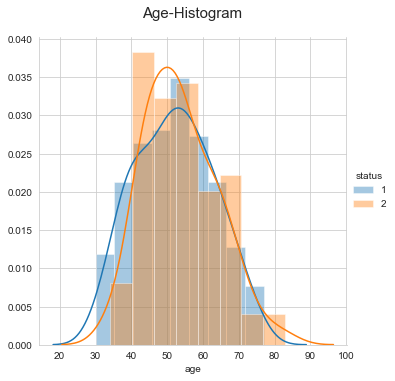

In [21]:
g = sns.FacetGrid(Haberman, hue ="status",size = 5) \
    .map(sns.distplot,"age") \
    .add_legend();
g.fig.suptitle('Age-Histogram',fontsize=15,x =0.5, y= 1.05)
plt.show();

# Observation
<blockquote>Maximum Status-1 patients lie in the age of 50-60.</blockquote>
<blockquote>Minimum status-1 patients lie in the range of 70-80.</blockquote>
<blockquote>Maximum Status -2 patients lie in the age of 40-50.</blockquote>
<blockquote>Minimum status-2 patients lie in the range of 70-85.</blockquote>

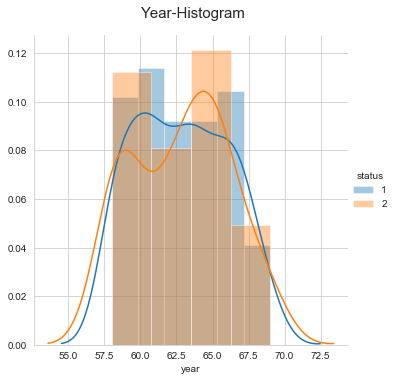

In [23]:
g = sns.FacetGrid(Haberman, hue ="status",size = 5) \
    .map(sns.distplot,"year") \
    .add_legend();
g.fig.suptitle('Year-Histogram',fontsize=15,x =0.5, y= 1.05)
plt.show();

# Observation
<blockquote>Maximum number of status-1 patients were administered in the hospital in between 1960-1963.</blockquote>
<blockquote>Minimum number of status-1 patients were administered in the hospital in between 1967-1969.</blockquote>
<blockquote>Maximum number of status-2 patients were administered in the hospital in between 1963-1966.</blockquote>
<blockquote>Minimum number of status-2 patients were administered in the hospital in between 1966-1969.</blockquote>

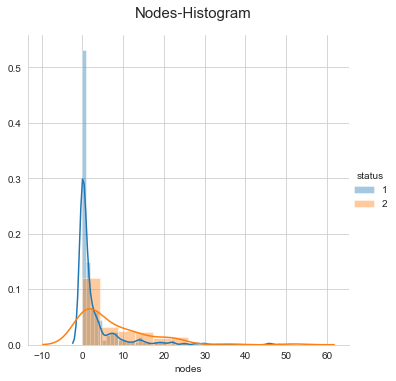

In [24]:
g = sns.FacetGrid(Haberman, hue ="status",size = 5) \
    .map(sns.distplot,"nodes") \
    .add_legend();
g.fig.suptitle('Nodes-Histogram',fontsize=15,x =0.5, y= 1.05)
plt.show();

# Observation:
<blockquote>1. We can not much make out when we use age and year as the features to find the correlation with status as expected.</blockquote>
<blockquote>2. People with nodes greater than 4 lies mostly in status 2 category whereas less than 4 lies mostly in status 1 category.</blockquote>

# Cumulative Density Function (CDF1)

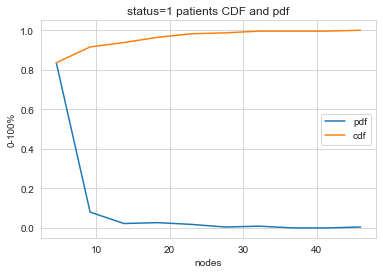

In [33]:
counts, bin_edges = np.histogram(status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label ='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title("status=1 patients CDF and pdf")
plt.xlabel("nodes")
plt.ylabel("0-100%")
plt.legend(loc='best')
plt.show();


# Observation
<blockquote>1. From CDF1 we can say around 83% patients who have status as 1 have less than 4 nodes.</blockquote>
<blockquote>2. From CDF1 we can say that 90% patients who have status as 1 have 10 nodes.</blockquote>

# Cumulative Density Function (CDF2)

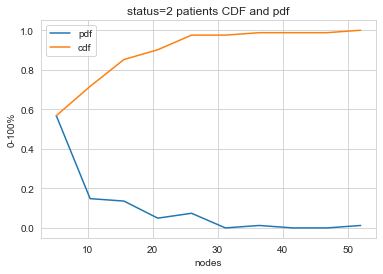

In [34]:
counts, bin_edges = np.histogram(status2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title("status=2 patients CDF and pdf")
plt.xlabel("nodes")
plt.ylabel("0-100%")
plt.legend(loc='best')
plt.show();


# Observation
<blockquote>1. From CDF2 we can say that around 60% patients who have status as 2 have less than 4 nodes.</blockquote>
<blockquote>2. From CDF2 we can say that 90% patients who have status as 2 have 20 nodes.</blockquote>


# Box plot

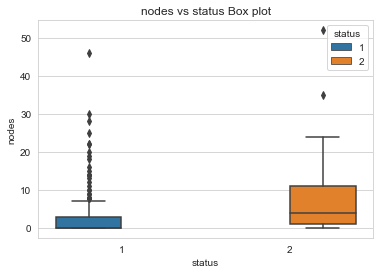

In [41]:
sns.boxplot(x = 'status', y ='nodes',hue = 'status',data= Haberman).set_title("nodes vs status Box plot")
plt.show()

# Observation
<blockquote>1. From Box plot median for status 1 patients is 0 whereas medain for status 2 patients is around 5.</blockquote>
<blockquote>2. 25 and 75 percentile for status 1 patients are  0 and 3 nodes respectively. Therefore 50 % of our status 1 patients have in between 0 and 3 nodes.(IQR-3)</blockquote>
<blockquote>3.25 and 75 percentile for status 2 patients are 1 and 11 nodes respectively. Therefore 50% of our status 2 patients have in between 1 and 11 nodes.(IQR-10)</blockquote>
<blockquote>4. Outliers in status 1 patients are more as compared to status 2 patients. Therefore , some patients who had higher nodes still lived more than 5 years.</blockquote>

# Violin plots

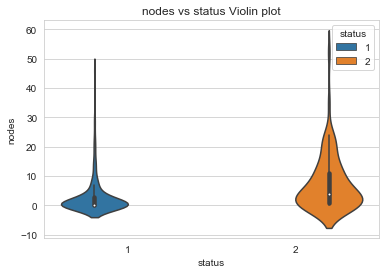

In [42]:
sns.violinplot(x="status", y="nodes",hue="status", data=Haberman, size=8).set_title("nodes vs status Violin plot")
plt.show()

# Observation
<blockquote>1. From Violin plot median for status 1 patients is 0 whereas medain for status 2 patients is around 3.</blockquote>
<blockquote>2. 25 and 75 percentile for status 1 patients are 0 and 3 nodes respectively. Therefore 50 % of our status 1 patients have in between 0 and 3.</blockquote>
<blockquote>3. 25 and 75 percentile for status 2 patients are 1 and 11 nodes respectively. Therefore 50% of our status 2 patients have in between 1 and 11 nodes.(IQR-10)</blockquote>
<blockquote>4. Outliers in status 1 patients are more as compared to status 2 patients.</blockquote>

# Bivariate Analysis

## Pair Plot

Text(0.5, 1.05, 'All Possible combinations of features')

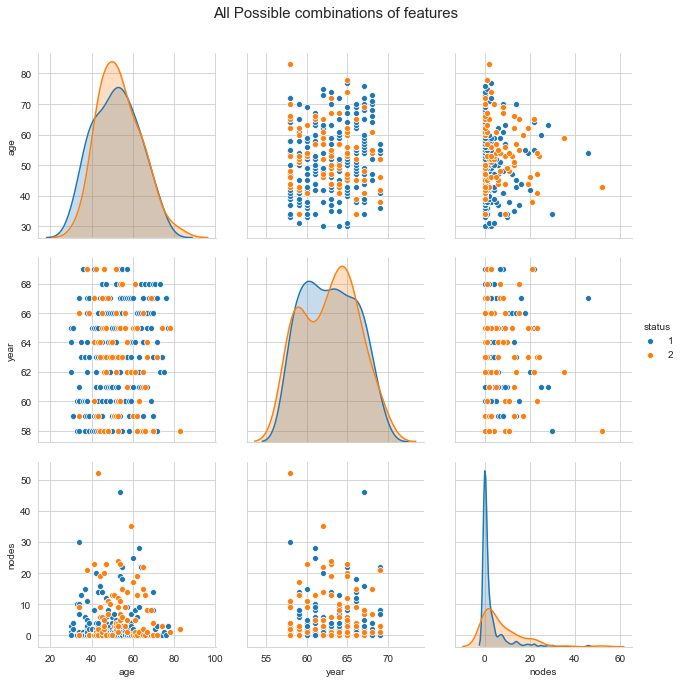

In [50]:
sns.set_style("whitegrid");
g =sns.pairplot(Haberman, hue="status", vars=['age','year','nodes'],size=3)
g.fig.suptitle("All Possible combinations of features", y=1.05,fontsize=15) 

# Observations:-
<blockquote>1. only the last column of pairplot should be looked upon as datapoints are separated.</blockquote>
<blockquote>2. Still year and nodes graph is better separated than others.</blockquote>

# Conclusion
<blockquote>1. if we have lesser than 4 nodes the probability of finding the patient with status 1 is more.</blockquote>
<blockquote>2. if we have more than 10 nodes the probability of finding the patient with status 2 is more.</blockquote>
<blockquote>3. nodes is one parameter which is useful for our classification.</blockquote>
<blockquote>4. Nodes is highly co-related to status, as higher the number of nodes more is the probability of patient lying in status 2 category.</blockquote>

<h6>Therefore we can do our binary classification on the basis of nodes.<h6>